In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score

In [266]:
# Load the data
survey_df = pd.read_csv("survey_results_public.csv")

In [267]:
# Select the relevant columns
survey_df = survey_df[["Age", "Gender", "Country", "YearsCode"]]

Outlier detection for column Age


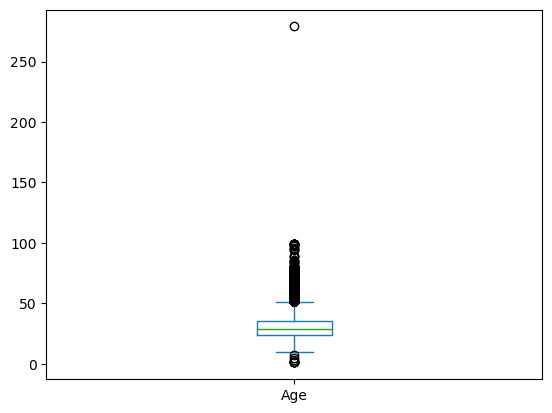

In [268]:
# Check for outliers
for col in survey_df.columns:
    if survey_df[col].dtype != "object":
        print("Outlier detection for column", col)
        survey_df[col].plot.box()
        plt.show()

In [269]:
# Convert non-numeric entries in 'YearsCode' to NaN
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')

# Remove outliers from 'YearsCode' column
survey_df = survey_df[survey_df['YearsCode'].between(0, 60)]


In [270]:
# Convert non-numeric entries in 'YearsCode' to NaN
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')

# Remove rows with missing values
survey_df = survey_df.dropna()

In [271]:
# Split the data into a training set and a testing set
X = survey_df[["Age"]]
y = survey_df["YearsCode"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

In [272]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [273]:
# Predict the years of programming experience on the testing set
y_pred = model.predict(X_test)

In [274]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [275]:
# Evaluate the model's performance

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 31.05741356772319
Root Mean Squared Error: 5.572917868381266
Mean Absolute Error: 4.049094779138909
R-squared: 0.6537691381852517


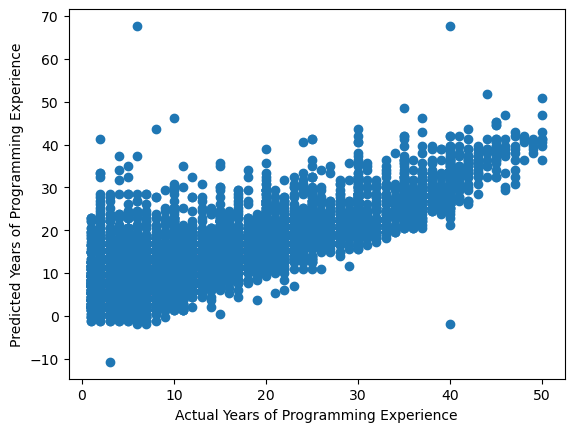

In [276]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Years of Programming Experience")
plt.ylabel("Predicted Years of Programming Experience")
plt.show()

In [277]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators


In [279]:
# Fit the model to the training data
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [280]:
# Predict the years of programming experience on the testing set
y_pred = model.predict(X_test_scaled)


In [281]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [282]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 29.457604776624482
Root Mean Squared Error: 5.42748604573282
Mean Absolute Error: 3.878584965589379
R-squared: 0.6716039516114595


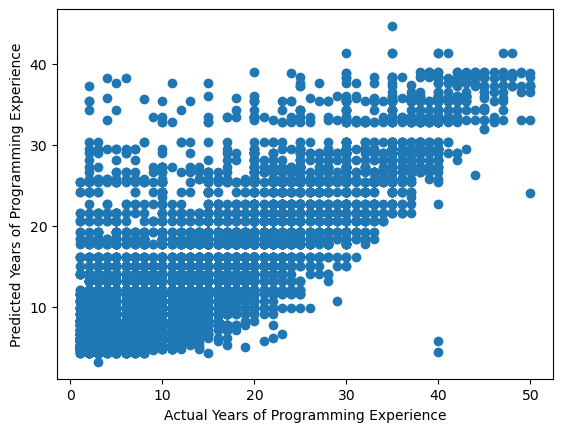

In [283]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Years of Programming Experience")
plt.ylabel("Predicted Years of Programming Experience")
plt.show()